# OpenCV 실습

배경이미지와 변경된 이미지를 비교하여 변화한 부분에 테두리를 그려내는 프로그램 작성

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


필요한 모듈 임포트

In [56]:
beforeImage = cv2.imread('beforeImage.png')

배경 이미지 로드

In [57]:
beforeGrayImage = cv2.cvtColor(beforeImage, cv2.COLOR_BGR2GRAY)

흑백 이미지로 색상 변환

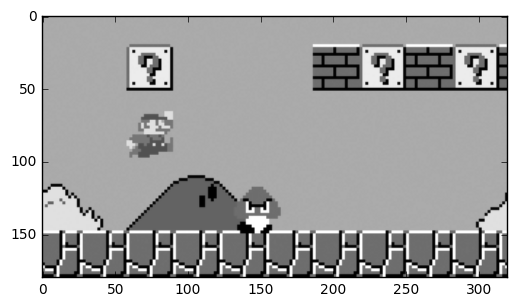

In [58]:
plt.imshow(beforeGrayImage, cmap = "gray")

이미지 테스트 출력

In [59]:
afterImage = cv2.imread('afterImage.png')

변화한 이미지 로드

In [60]:
afterGrayImage = cv2.cvtColor(afterImage, cv2.COLOR_BGR2GRAY)

이미 흑백 색상 변환

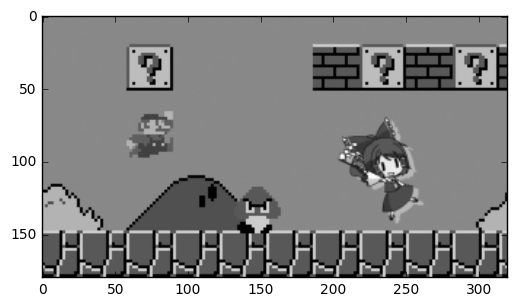

In [61]:
plt.imshow(afterGrayImage, cmap = "gray")

이미지 테스트 출력

In [62]:
differenceBetweenLoadedImages = cv2.absdiff(beforeGrayImage, afterGrayImage)

배경이미지와 변화 이미지를 비교하여 차이점을 발견한 내용의 이미지를 추출

In [63]:
differenceBetweenLoadedImages[differenceBetweenLoadedImages > 0] = 255

차이점이 있는 부분의 픽셀값을 모두 255로 통일

In [64]:
blurKernel = cv2.GaussianBlur(differenceBetweenLoadedImages, (3, 3), 0)

노이즈를 줄이기 위한 블러효과 생성

In [65]:
differenceBetweenLoadedImages = cv2.adaptiveThreshold(differenceBetweenLoadedImages, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 10)

블러 효과 적용 (이미지, 쓰레쉬 홀드, ?, ?, 쪼게는 픽셀 값, 뺄 상수 값)

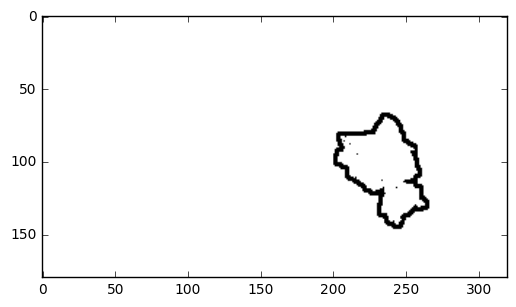

In [66]:
plt.imshow(differenceBetweenLoadedImages, cmap = "gray")

이미지 테스트 출력

In [67]:
imageEdgesDetected = cv2.Canny(differenceBetweenLoadedImages, 0, 255)

캐니 엣지 추출 알고리즘 적용 

In [68]:
_, contours, hierarchy = cv2.findContours(imageEdgesDetected, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

테두리 추출

In [69]:
print contours

[array([[[242, 117]],

       [[242, 119]],

       [[244, 119]],

       [[244, 117]]], dtype=int32), array([[[242, 118]],

       [[243, 117]],

       [[244, 118]],

       [[243, 119]]], dtype=int32), array([[[232, 112]],

       [[232, 114]],

       [[234, 114]],

       [[234, 112]]], dtype=int32), array([[[232, 113]],

       [[233, 112]],

       [[234, 113]],

       [[233, 114]]], dtype=int32), array([[[215,  94]],

       [[215,  96]],

       [[217,  96]],

       [[217,  94]]], dtype=int32), array([[[215,  95]],

       [[216,  94]],

       [[217,  95]],

       [[216,  96]]], dtype=int32), array([[[253,  93]],

       [[253,  95]],

       [[254,  96]],

       [[254,  98]],

       [[255,  99]],

       [[255, 103]],

       [[256, 104]],

       [[256, 105]],

       [[257, 106]],

       [[257, 108]],

       [[256, 109]],

       [[255, 109]],

       [[255, 110]],

       [[253, 112]],

       [[250, 112]],

       [[249, 113]],

       [[248, 113]],

       [[248,

추출된 테두리들 테스트 출력

In [70]:
print hierarchy

[[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 4  0  3 -1]
  [-1 -1 -1  2]
  [ 6  2  5 -1]
  [-1 -1 -1  4]
  [ 7  4 -1 -1]
  [ 9  6  8 -1]
  [-1 -1 -1  7]
  [10  7 -1 -1]
  [11  9 -1 -1]
  [-1 10 -1 -1]]]


In [71]:
maxContoursArea = 0
calculatedContourArea = 0
maxContoursIndex = []
for contoursIndex in contours:
    calculatedContourArea = cv2.contourArea(contoursIndex)
    if maxContoursArea < calculatedContourArea:
        maxContoursArea = calculatedContourArea
        maxContoursIndex = contoursIndex
print maxContoursIndex, maxContoursArea

[[[234  66]]

 [[233  67]]

 [[232  67]]

 [[232  68]]

 [[231  69]]

 [[231  70]]

 [[228  73]]

 [[228  74]]

 [[227  75]]

 [[227  76]]

 [[225  78]]

 [[222  78]]

 [[221  79]]

 [[204  79]]

 [[203  80]]

 [[202  80]]

 [[202  81]]

 [[201  82]]

 [[201  85]]

 [[202  86]]

 [[202  88]]

 [[203  89]]

 [[202  88]]

 [[202  86]]

 [[201  85]]

 [[201  82]]

 [[204  79]]

 [[221  79]]

 [[222  78]]

 [[226  78]]

 [[226  77]]

 [[227  76]]

 [[227  75]]

 [[230  72]]

 [[230  71]]

 [[231  70]]

 [[231  69]]

 [[234  66]]

 [[237  66]]

 [[238  67]]

 [[239  67]]

 [[240  68]]

 [[241  68]]

 [[246  73]]

 [[246  74]]

 [[247  75]]

 [[247  77]]

 [[248  78]]

 [[248  79]]

 [[249  80]]

 [[249  83]]

 [[252  86]]

 [[253  86]]

 [[254  87]]

 [[255  87]]

 [[257  89]]

 [[257  96]]

 [[258  97]]

 [[258 101]]

 [[259 102]]

 [[259 103]]

 [[260 104]]

 [[260 110]]

 [[257 113]]

 [[257 114]]

 [[258 115]]

 [[259 115]]

 [[261 117]]

 [[261 122]]

 [[262 123]]

 [[262 124]]

 [[265

추출된 테두리들 중 면적이 제일 넓은걸 선택

In [72]:
cv2.drawContours(beforeGrayImage, [maxContoursIndex], 0, 255, 3)

array([[137, 137, 136, ..., 137, 137, 137],
       [137, 136, 137, ..., 137, 136, 137],
       [137, 136, 137, ..., 137, 136, 137],
       ..., 
       [ 88,  87,  87, ...,  88,  88,  88],
       [  4,   4,   4, ...,   4,   4,   4],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

테두리 그리기

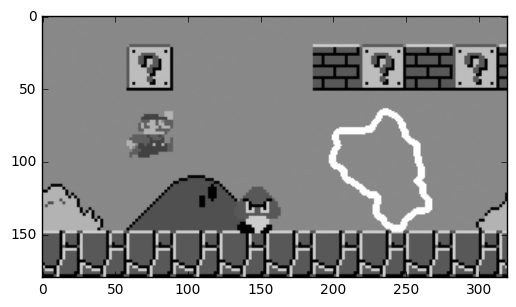

In [73]:
plt.imshow(beforeGrayImage, cmap = "gray")

변화한 내용에 대한 테두리를 그린 이미지를 출력

In [74]:
(positionX, positionY, width, height) = cv2.boundingRect(maxContoursIndex)
print positionX, positionY, width, height

199 66 67 81


변화한 부분에 대한 사각형 추출

In [75]:
cv2.rectangle(beforeGrayImage, (positionX, positionY), (positionX + width, positionY + height), 255, 2)

array([[137, 137, 136, ..., 137, 137, 137],
       [137, 136, 137, ..., 137, 136, 137],
       [137, 136, 137, ..., 137, 136, 137],
       ..., 
       [ 88,  87,  87, ...,  88,  88,  88],
       [  4,   4,   4, ...,   4,   4,   4],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

사각형 그림

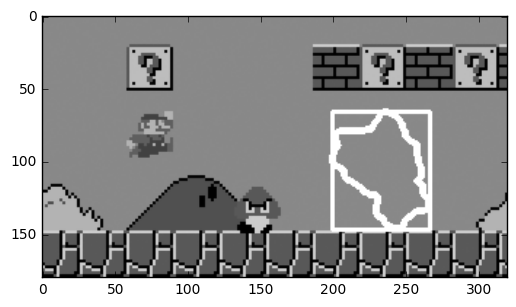

In [76]:
plt.imshow(beforeGrayImage, cmap = "gray")

결과 이미지 출력